In [1]:
import tensorflow as tf
import os
import tensorflow_addons as tfa
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, F1Score, Accuracy 
from tensorflow.keras import backend as K
from tensorflow_addons.metrics import F1Score

D:\Software\Python Anaconda\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
D:\Software\Python Anaconda\Lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.15.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make s

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
pwd

'C:\\Users\\kenne\\COE 005\\00image_classifier'

In [5]:
data_dir = 'data'

In [6]:
image_exts = ['jpeg','jpg','bmp','png']

In [7]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir):
    print(image_class)

boot
sandal
shoe


In [9]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f'Image not in ext list {image_path}')
                os.remove(image_path) 
        except Exception as e:
            print(f'Issue with image {image_path}: {e}')
            os.remove(image_path) 

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 120 files belonging to 3 classes.


In [11]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
data_iterator

In [14]:
batch = data_iterator.next()

In [15]:
batch[0].shape

(32, 256, 256, 3)

In [16]:
# class 0 = boots, class 1 = sandals, class2 = shoes
batch[1]

array([1, 0, 0, 2, 1, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 2, 2, 0, 2, 1, 2,
       0, 2, 1, 0, 1, 2, 1, 1, 1, 1])

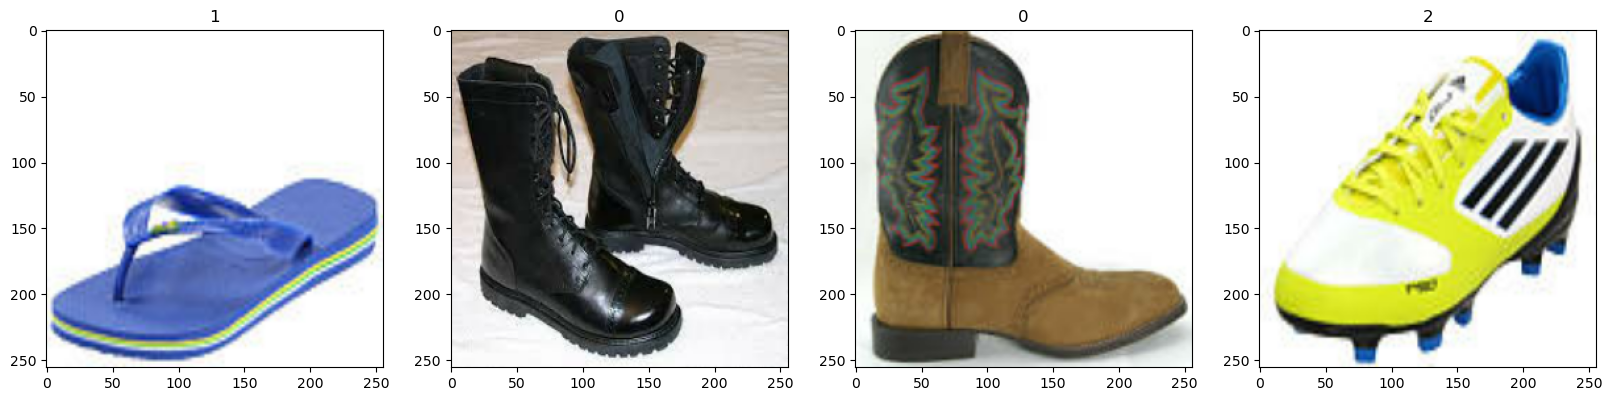

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [18]:
batch[0].shape

(32, 256, 256, 3)

In [19]:
data = data.map(lambda x,y: (x/255, y))

In [20]:
data.as_numpy_iterator().next()

(array([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         ...,
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]],
 
 
        [

In [21]:
batch[0].max()

255.0

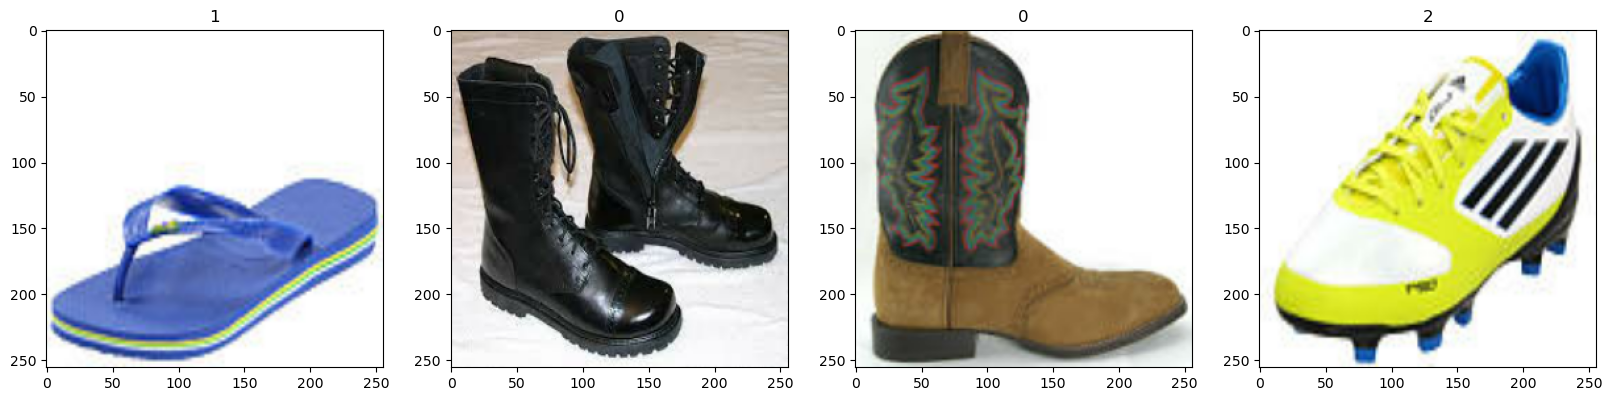

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [23]:
len(data)

4

In [24]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [25]:
train_size+val_size+test_size

4

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [27]:
len(data)

4

In [28]:
model = Sequential()

In [29]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax')) 

In [30]:
from keras.optimizers import Adam

optimizer = Adam()
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)       

In [32]:
logdir='./logs'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50


2/2 [==============================] - 4s 672ms/step - loss: 3.3925 - accuracy: 0.2188 - val_loss: 3.1734 - val_accuracy: 0.2188
Epoch 2/50
2/2 [==============================] - 1s 486ms/step - loss: 1.9481 - accuracy: 0.4062 - val_loss: 1.2305 - val_accuracy: 0.2812
Epoch 3/50
2/2 [==============================] - 1s 534ms/step - loss: 1.0893 - accuracy: 0.3281 - val_loss: 1.0059 - val_accuracy: 0.3750
Epoch 4/50
2/2 [==============================] - 1s 499ms/step - loss: 0.9739 - accuracy: 0.5156 - val_loss: 0.9064 - val_accuracy: 0.7500
Epoch 5/50
2/2 [==============================] - 1s 508ms/step - loss: 0.9076 - accuracy: 0.7344 - val_loss: 0.8282 - val_accuracy: 0.7500
Epoch 6/50
2/2 [==============================] - 1s 557ms/step - loss: 0.7830 - accuracy: 0.8281 - val_loss: 0.7498 - val_accuracy: 0.7188
Epoch 7/50
2/2 [==============================] - 1s 550ms/step - loss: 0.6716 - accuracy: 0.8281 - val_loss: 0.4928 - val_accuracy: 0.9688
Epoch 8/50
2/2 [==

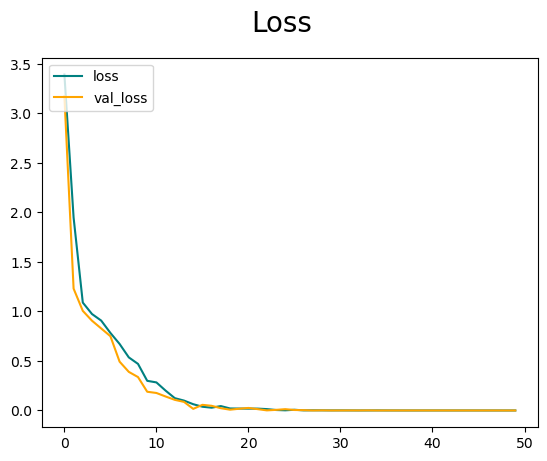

In [35]:
fig = plt.figure()

plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')

fig.suptitle('Loss', fontsize=20)

plt.legend(loc="upper left")

plt.show()

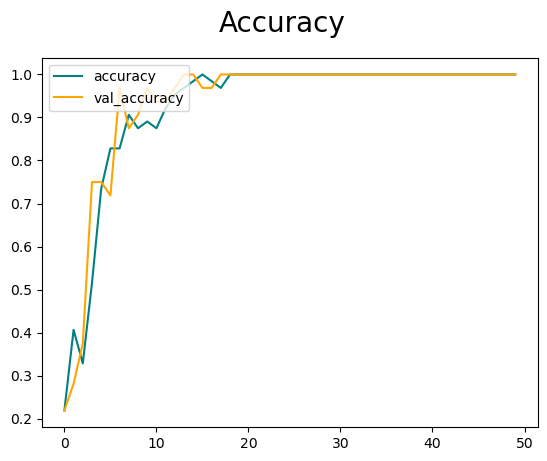

In [36]:
fig = plt.figure()

plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')

fig.suptitle('Accuracy', fontsize=20)

plt.legend(loc="upper left")
plt.show()

In [37]:
f1 = tfa.metrics.F1Score(num_classes=3, average='weighted')
pre = Precision()  
re = Recall()
acc = Accuracy()


for batch in test.as_numpy_iterator():
    X, y_true = batch

    y_pred = model.predict(X)

    if y_pred.shape[-1] >   1:
        y_pred = np.argmax(y_pred, axis=-1)

    y_true_one_hot = tf.one_hot(y_true, depth=3)  
   
    y_pred_one_hot = tf.one_hot(y_pred, depth=3)  
    pre.update_state(y_true_one_hot, y_pred_one_hot)
    re.update_state(y_true_one_hot, y_pred_one_hot)
    acc.update_state(y_true_one_hot, y_pred_one_hot)
    f1.update_state(y_true_one_hot, y_pred_one_hot)

1/1 [==============================] - 0s 192ms/step


In [42]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}, F1 Score: {f1.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0, F1 Score: 1.0


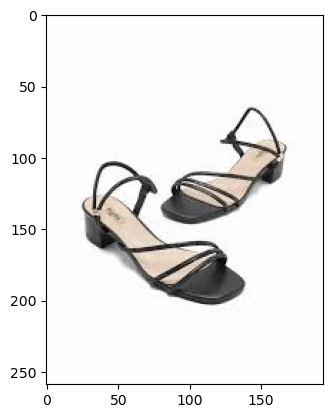

In [43]:
img = cv2.imread('sandaltest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

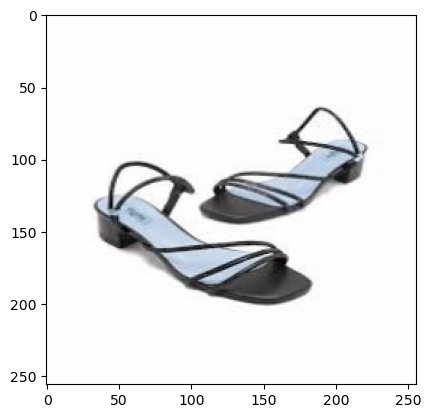

In [44]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))

plt.show()

In [45]:
resize.shape

TensorShape([256, 256, 3])

In [46]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [47]:
yhat = model.predict(np.expand_dims(resize / 255, 0))
predicted_class = np.argmax(yhat)

1/1 [==============================] - 0s 41ms/step


In [48]:
yhat

array([[2.0647247e-18, 9.9999988e-01, 1.3007258e-07]], dtype=float32)

In [49]:
confidence_threshold = 0.5

max_index = np.argmax(yhat)


if yhat[0][max_index] >= confidence_threshold:
    if max_index ==  0:
        category = "boots"
    elif max_index ==  1:
        category = "sandals"
    elif max_index ==  2:
        category = "shoes"
else:
    category = "unknown"
print(category)

sandals


In [50]:
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model

In [51]:
model.save(os.path.join('models','shoe-sandal-boot.h5'))

D:\Software\Python Anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
